In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
from zillow import features,config,info
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [4]:
a=info.get_hpi_by_county()

In [12]:
aa=info.get_modelhpi_by_block()[2017]

In [57]:
b=aa['39'][201701]
str({v for v in b.keys() if len(v)==5})

"set(['39095', '39027', '39109', '39029', '39059', '39025', '39083', '39107', '39057', '39067', '39141', '39065', '39143', '39063', '39145', '39147', '39149', '39087', '39111', '39069', '39049', '39127', '39007', '39125', '39001', '39045', '39003', '39041', '39163', '39043', '39161', '39009', '39167', '39047', '39165', '39129', '39011', '39023', '39103', '39053', '39089', '39101', '39173', '39051', '39157', '39071', '39155', '39073', '39153', '39075', '39151', '39077', '39097', '39099', '39093', '39159', '39091', '39113', '39017', '39137', '39015', '39131', '39013', '39133', '39079', '39171', '39035', '39119', '39037', '39139', '39031', '39019'])"

In [32]:
def g(a,u, diff=False):
    b=aa[u[:2]]
    c={v:b[v][u] for v in b.keys()}
    b=pd.Series(c) 
    b=b.sort_index()
    if diff: b=        b.diff()
    return b

In [36]:
def f(a,u,diff=False):
    b=a[u]
    b=pd.Series(b)
    b=b[b.index>=201701]
    b=b[b.index<=201712]
    b=b/b.loc[201701]
    b=b.sort_index()
    if diff: b=        b.diff()
    return b 

In [50]:
def h(counties):
    for county in counties:
        ax=plt.subplot(211)
        pd.concat([f(a,county),g(a,county)],axis=1).plot(ax=ax)
        plt.legend(['fed','mod'])
        plt.title("County "+county)
        ax=plt.subplot(212)

        pd.concat([f(a,county,True),g(a,county, True)],axis=1).plot(kind='bar',ax=ax)
        plt.legend(['fed','mod'])
        plt.show()    

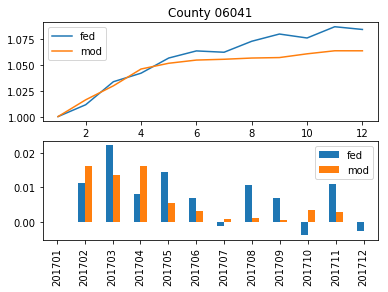

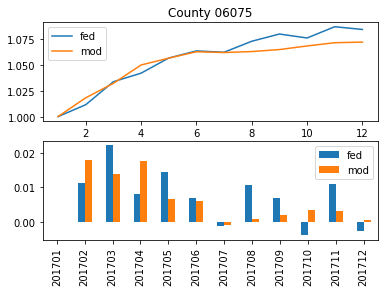

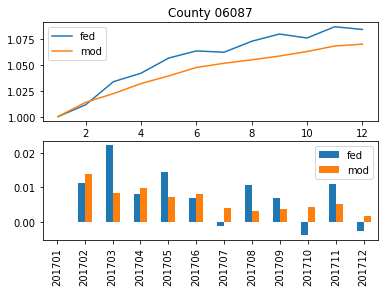

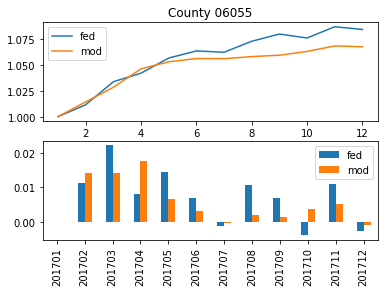

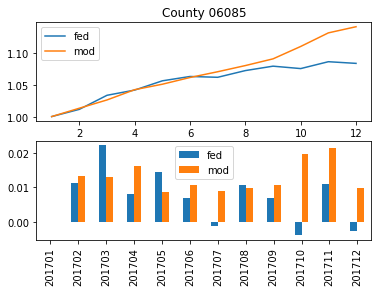

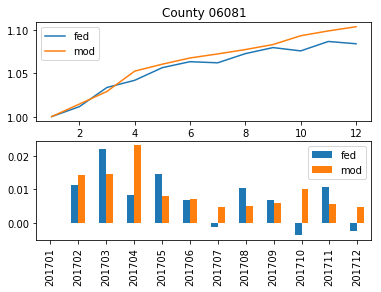

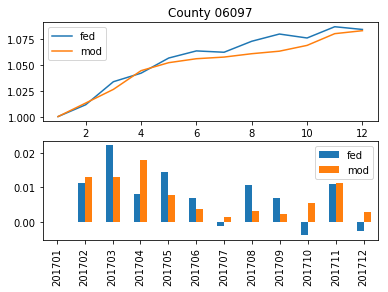

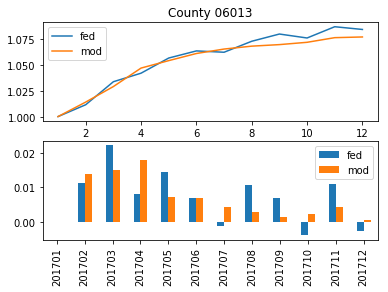

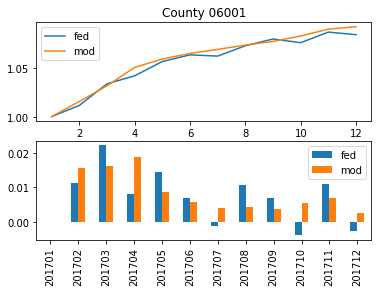

In [51]:
h(set(['06041', '06075', '06087', '06055', '06085', '06081', '06097', '06013', '06001']))

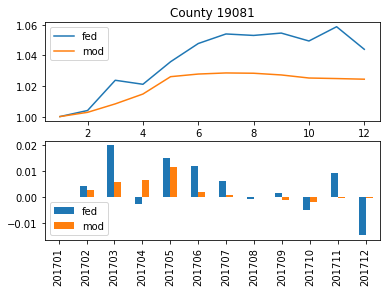

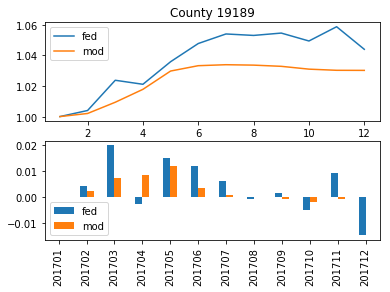

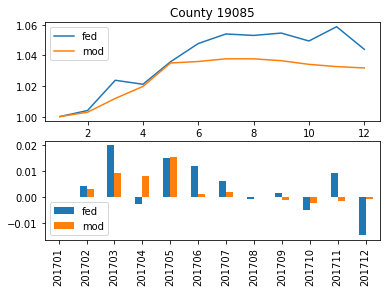

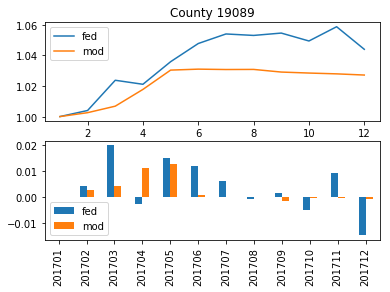

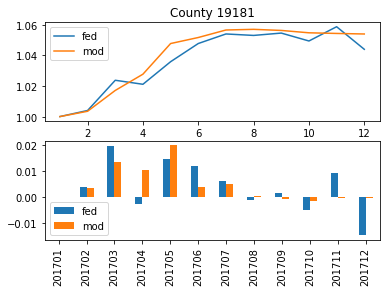

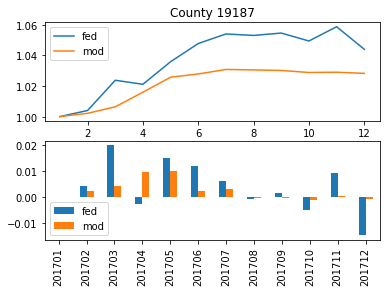

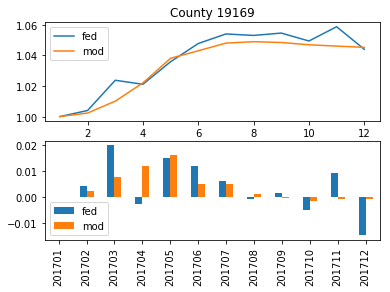

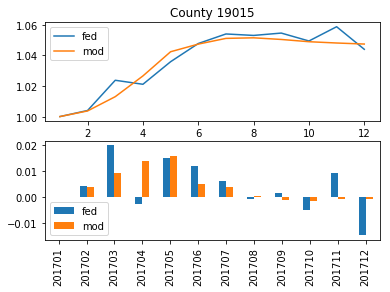

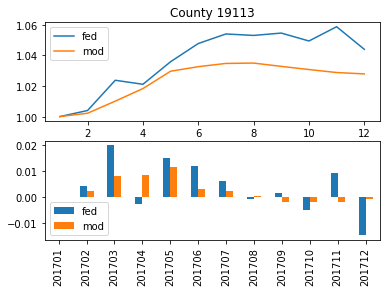

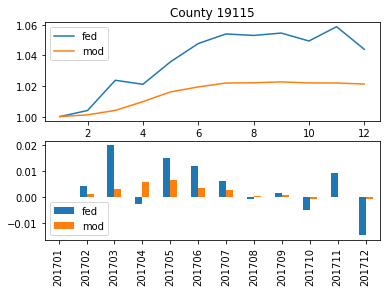

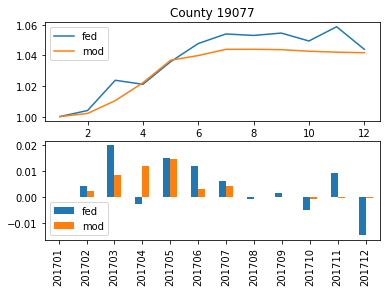

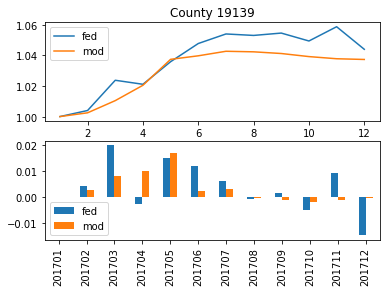

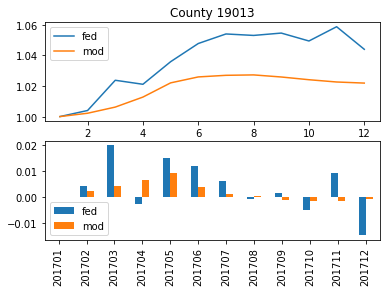

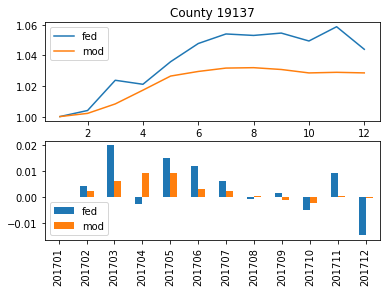

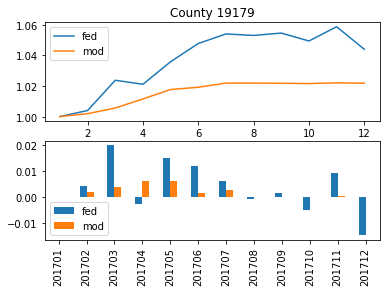

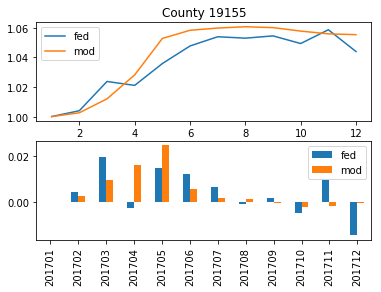

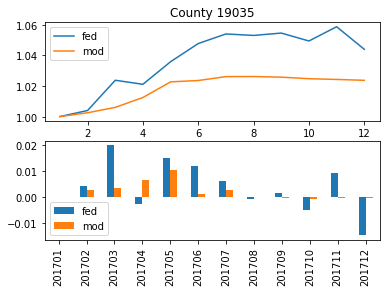

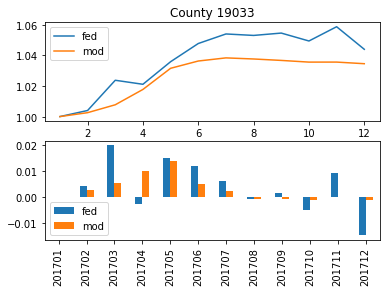

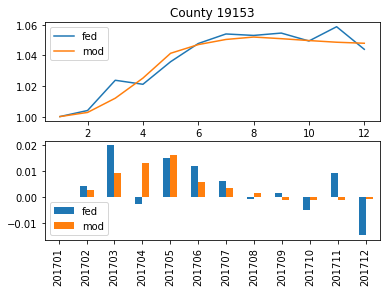

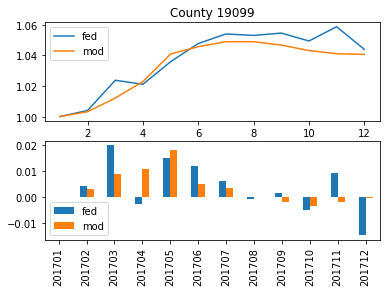

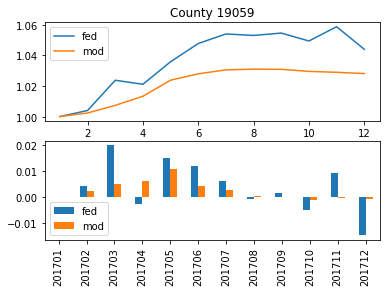

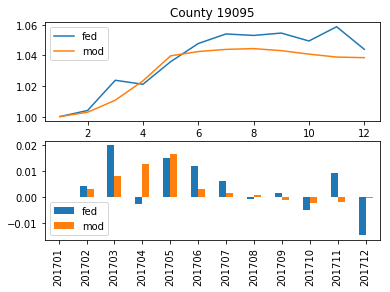

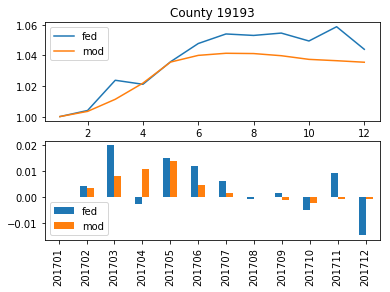

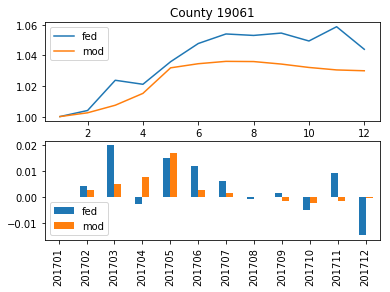

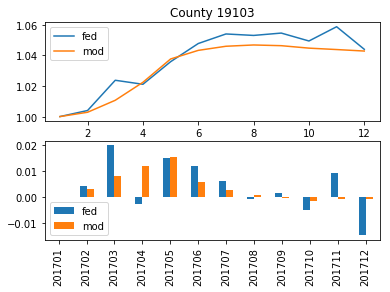

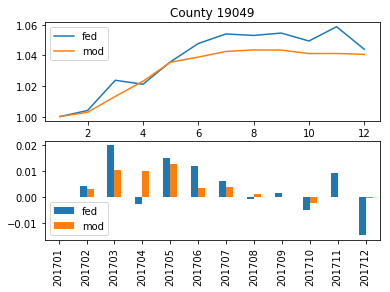

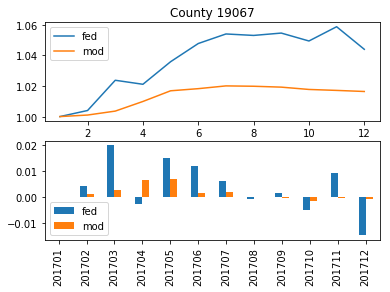

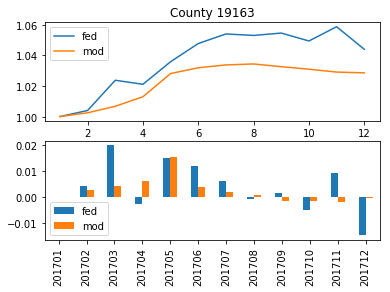

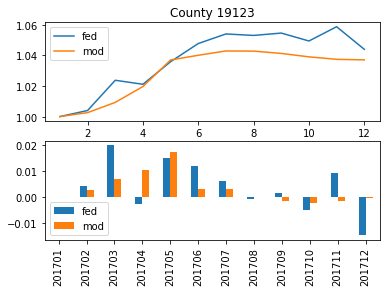

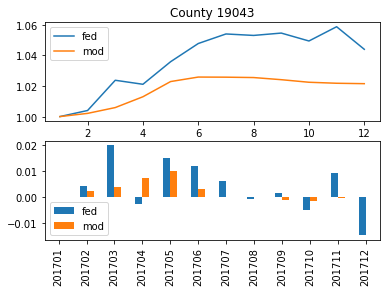

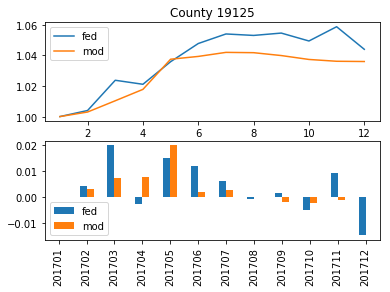

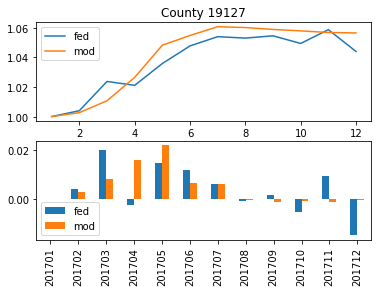

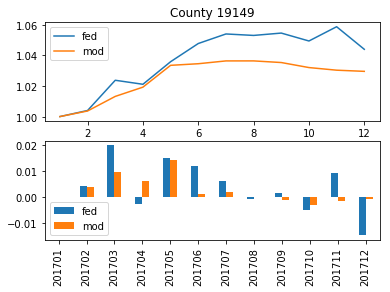

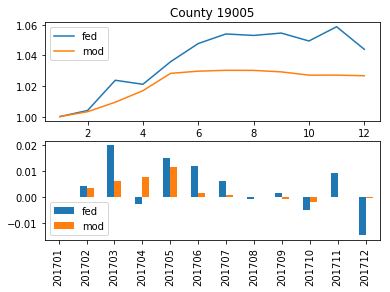

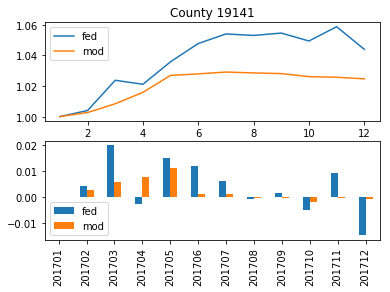

In [52]:
counties=set(['19081', '19189', '19085', '19089', '19181', '19187', '19125', '19015', '19113', '19115', '19077', '19139', '19013', '19137', '19179', '19155', '19035', '19033', '19153', '19099', '19059', '19095', '19193', '19061', '19103', '19067', '19049', '19163', '19123', '19043', '19169', '19127', '19149', '19005', '19141'])
h(counties)

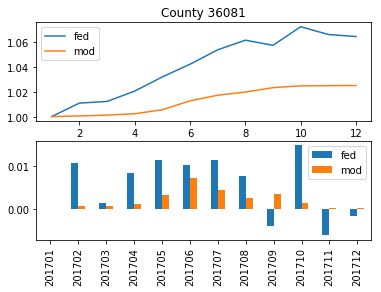

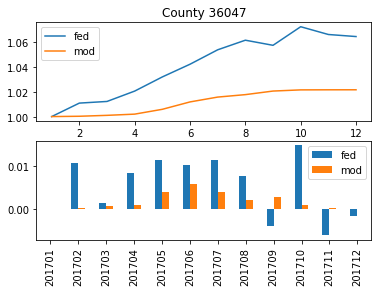

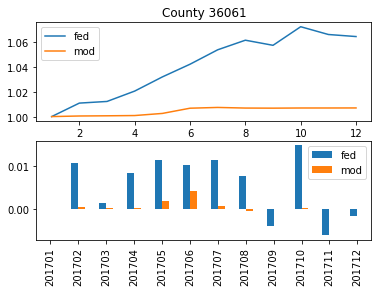

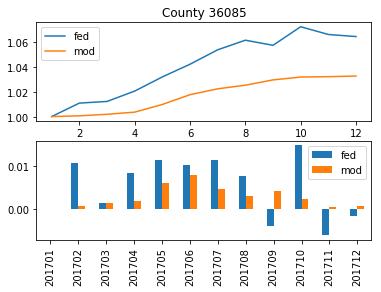

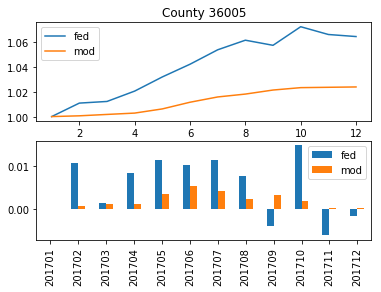

In [54]:
h(set(['36085', '36081', '36047', '36005', '36061']))

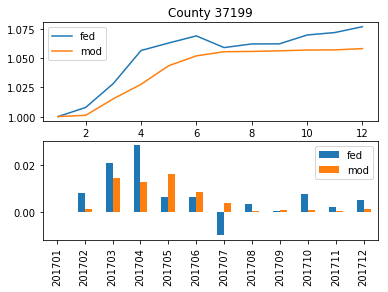

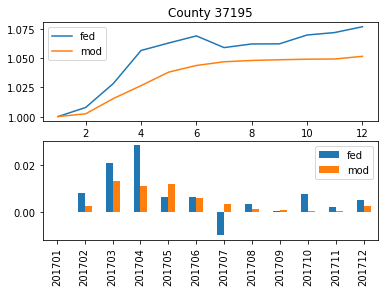

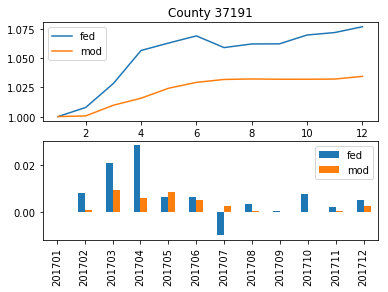

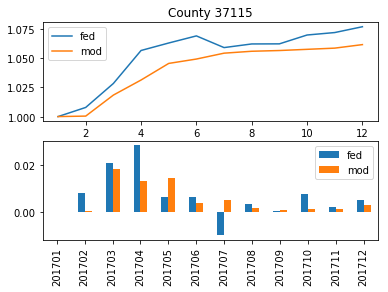

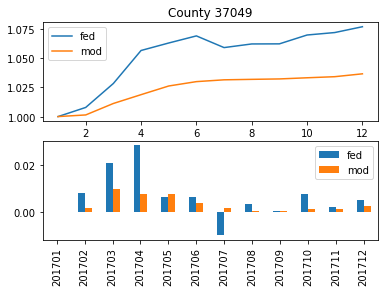

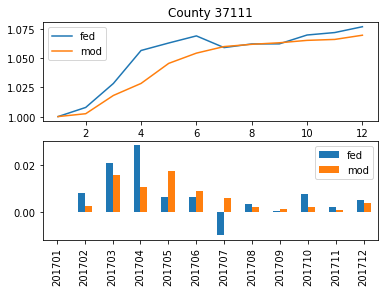

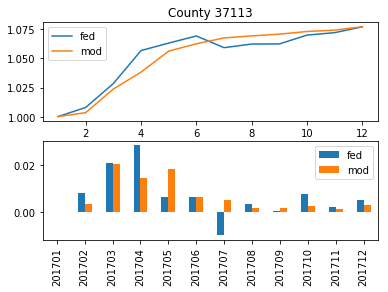

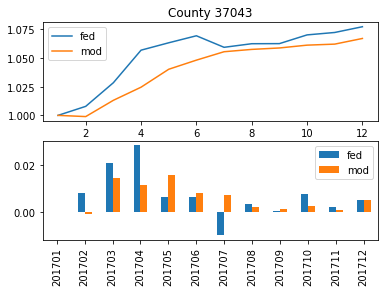

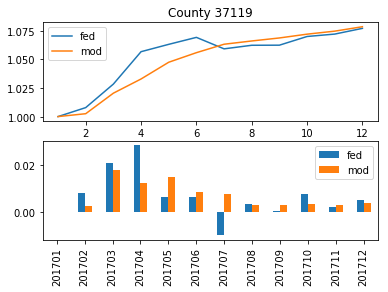

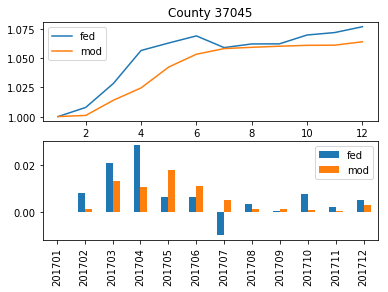

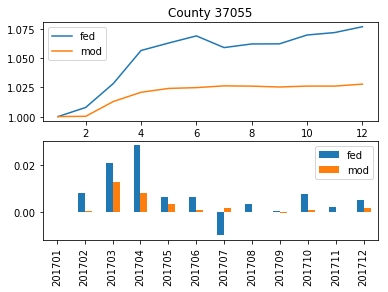

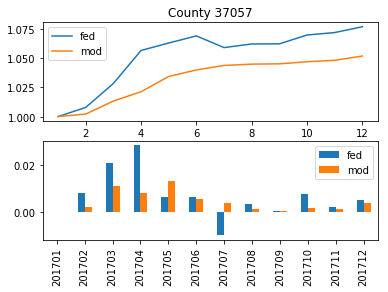

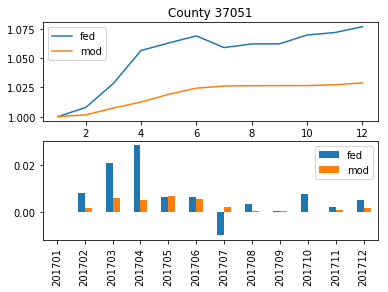

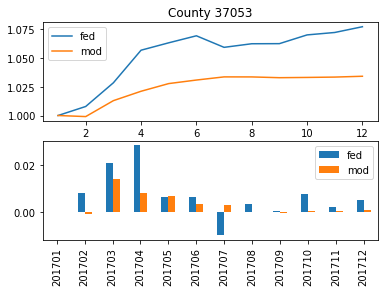

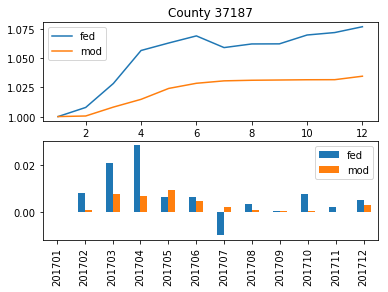

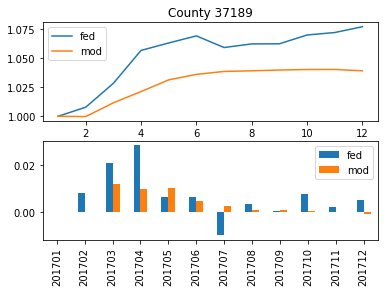

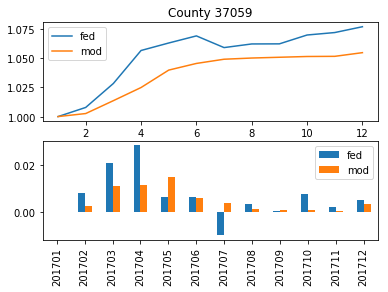

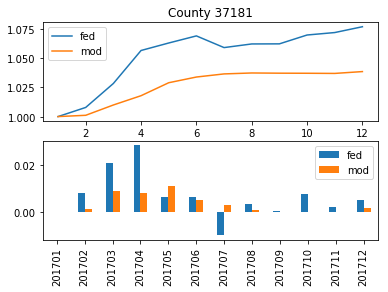

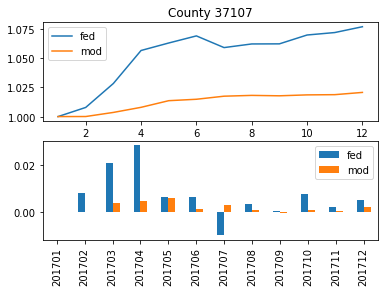

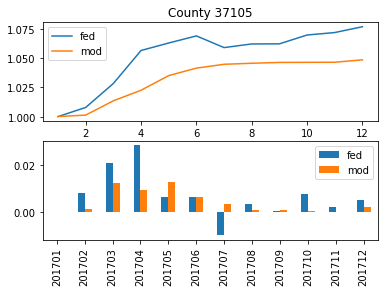

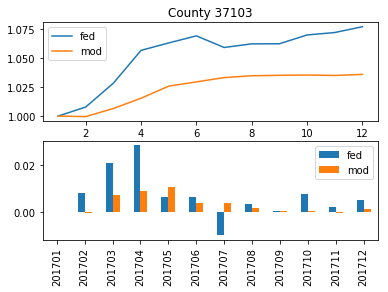

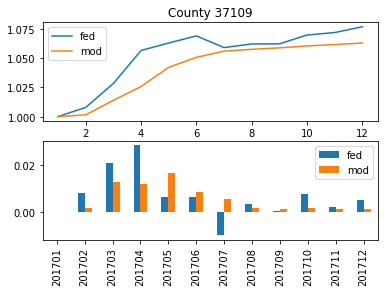

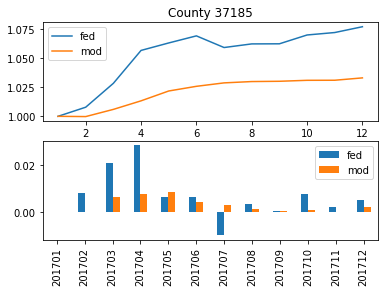

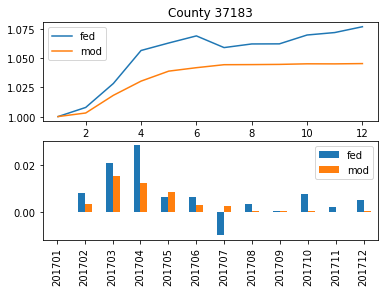

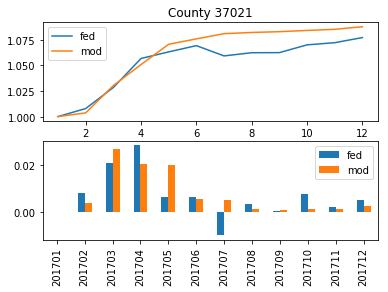

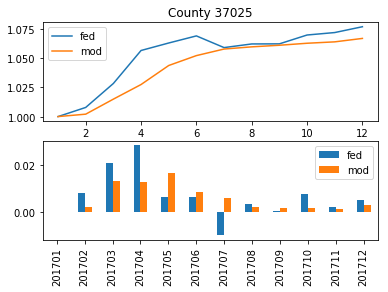

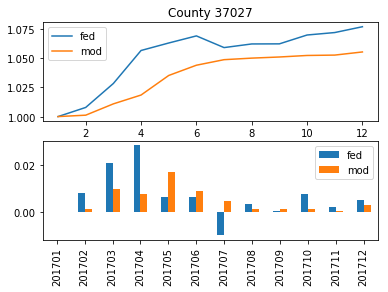

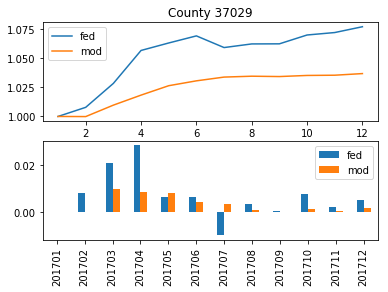

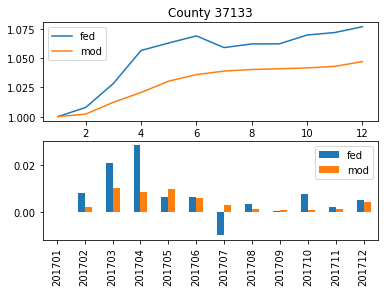

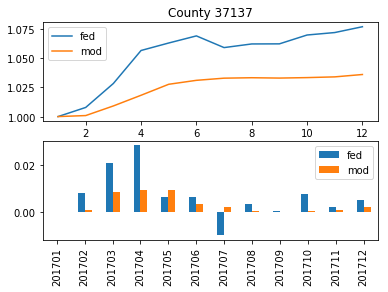

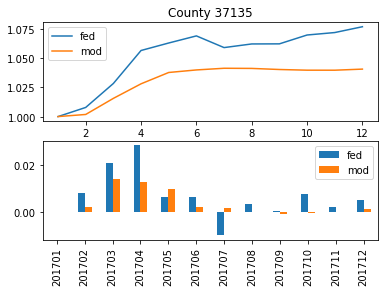

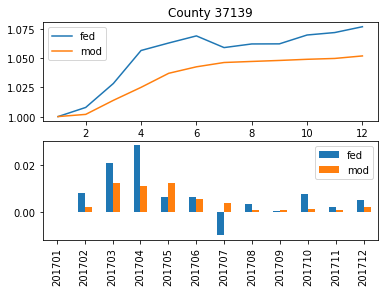

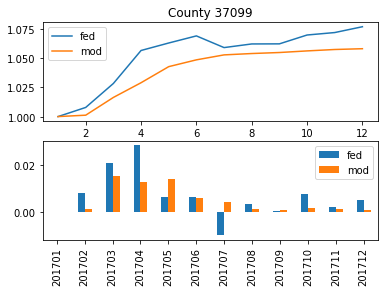

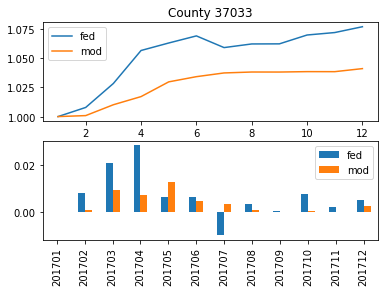

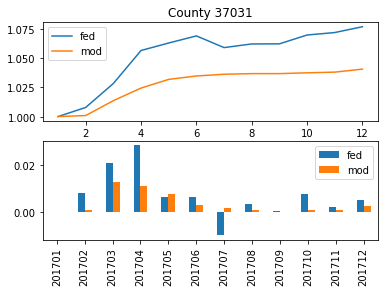

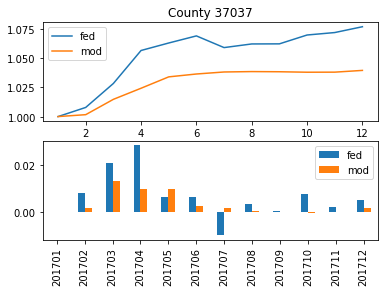

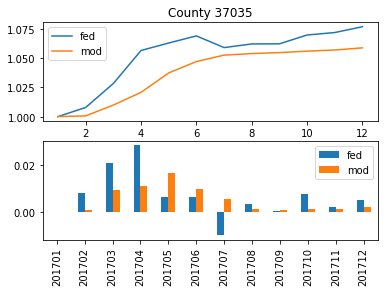

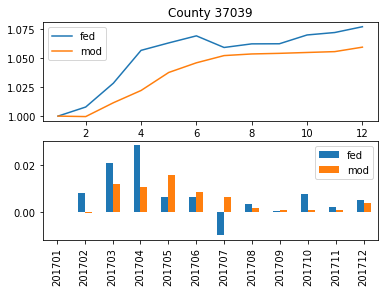

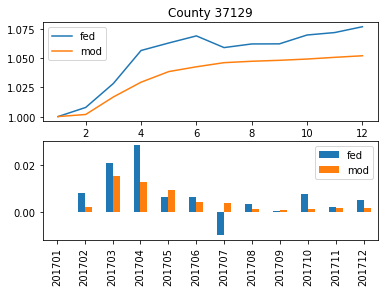

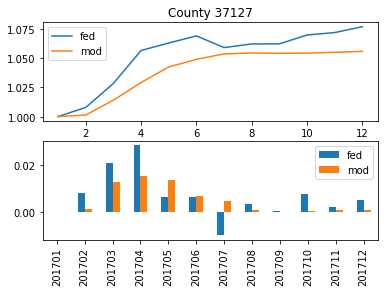

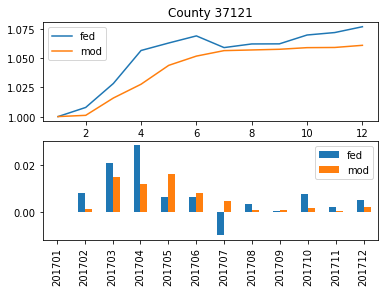

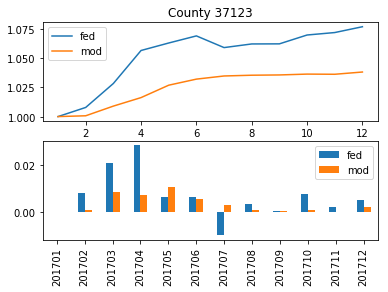

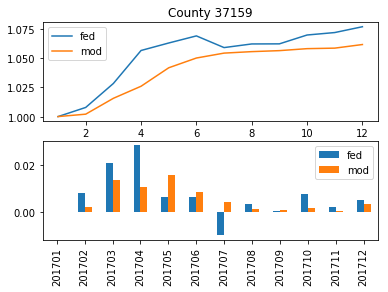

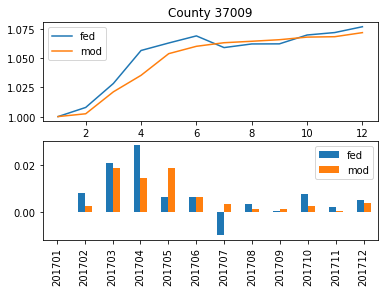

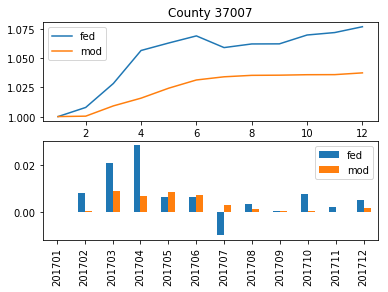

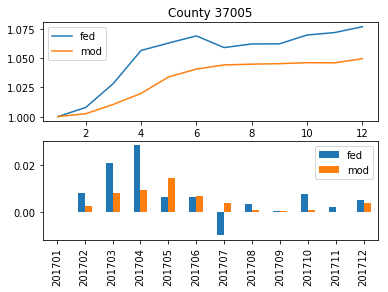

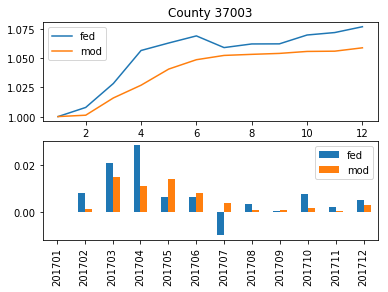

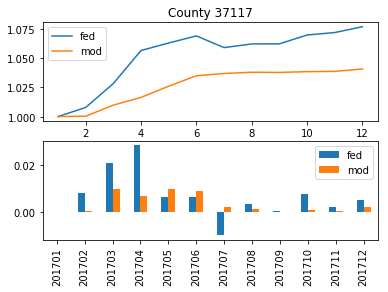

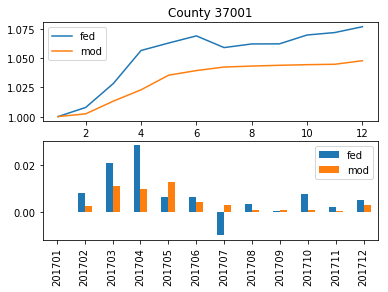

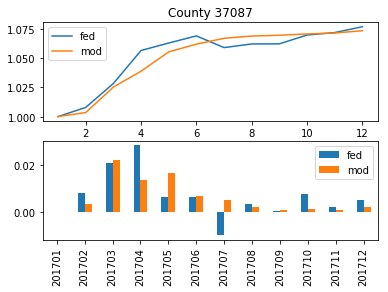

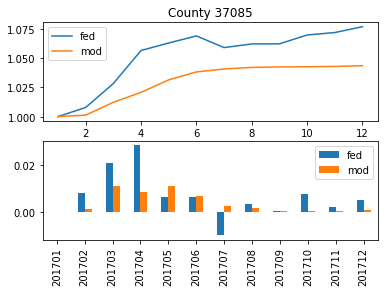

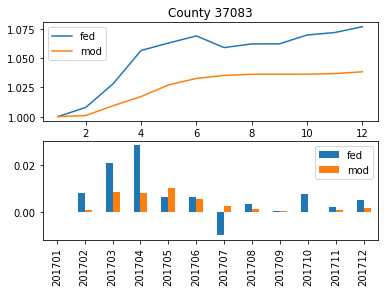

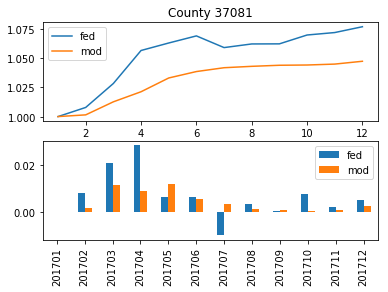

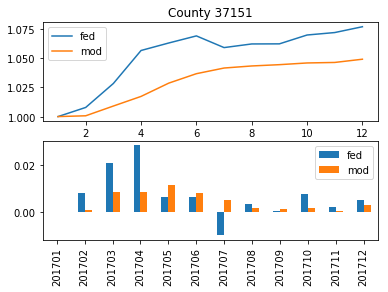

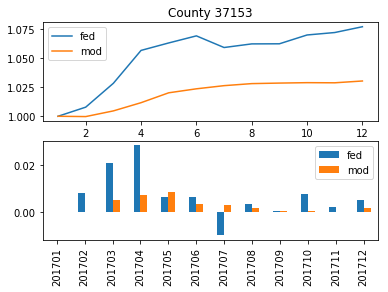

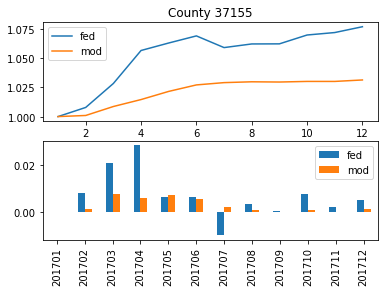

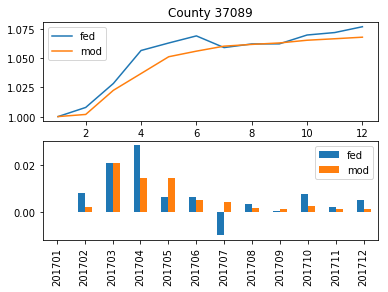

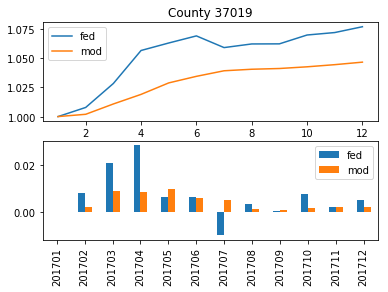

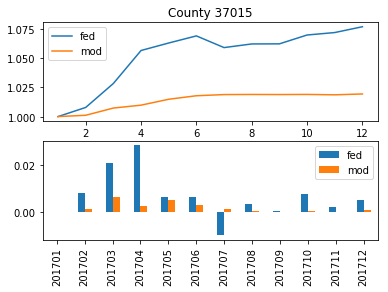

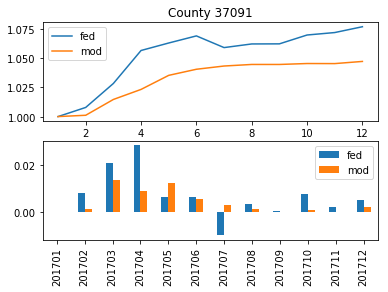

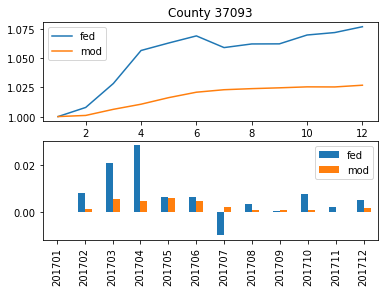

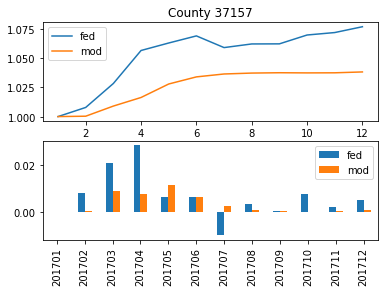

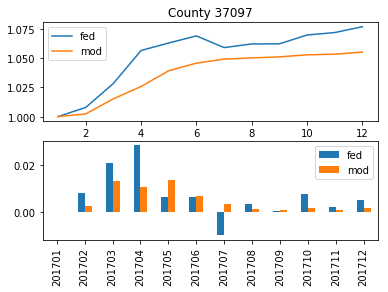

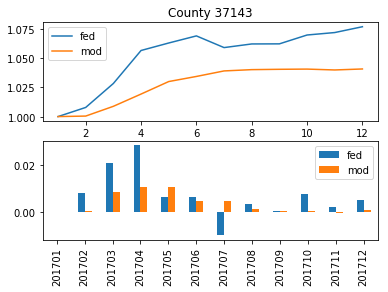

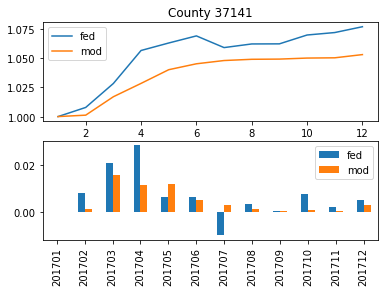

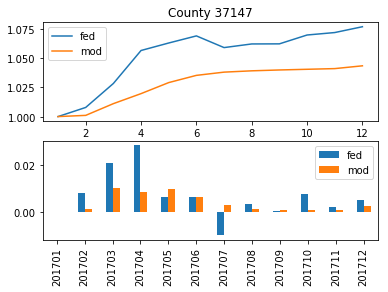

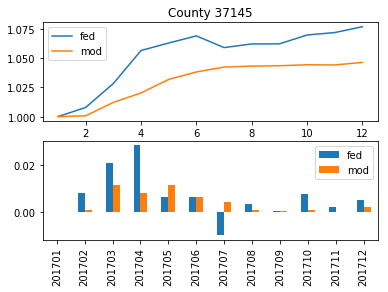

KeyError: '37177'

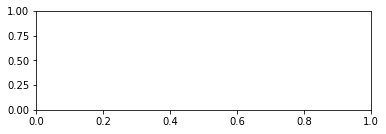

In [56]:
h(set(['37199', '37195', '37191', '37115', '37117', '37111', '37113', '37043', '37119', '37045', '37055', '37057', '37051', '37189', '37187', '37185', '37183', '37181', '37107', '37105', '37103', '37109', '37059', '37021', '37025', '37027', '37029', '37133', '37137', '37135', '37139', '37053', '37099', '37033', '37031', '37037', '37035', '37039', '37129', '37127', '37121', '37123', '37087', '37009', '37007', '37005', '37003', '37049', '37001', '37159', '37085', '37083', '37081', '37151', '37153', '37155', '37089', '37019', '37015', '37091', '37093', '37157', '37097', '37143', '37141', '37147', '37145', '37177', '37175', '37173', '37171', '37179', '37069', '37065', '37067', '37061', '37063', '37161', '37163', '37165', '37167', '37169', '37077', '37075', '37073', '37071']))

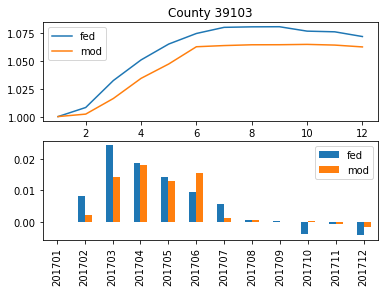

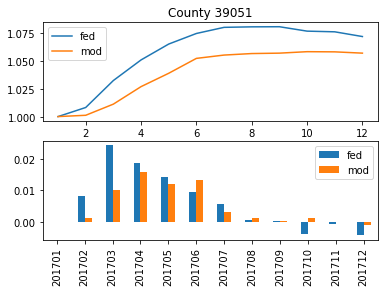

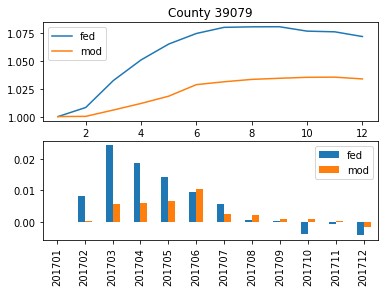

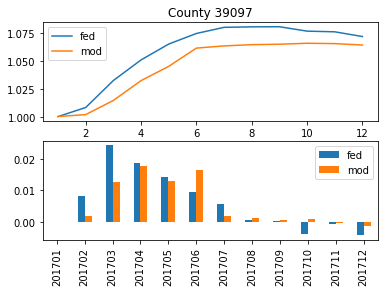

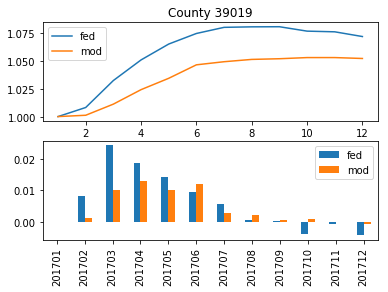

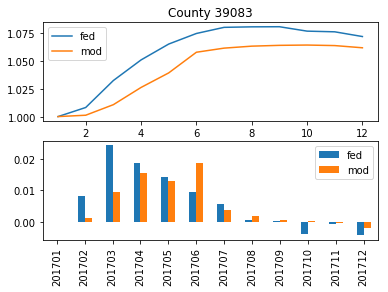

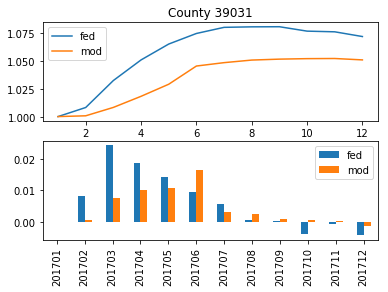

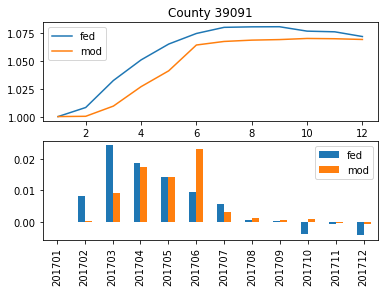

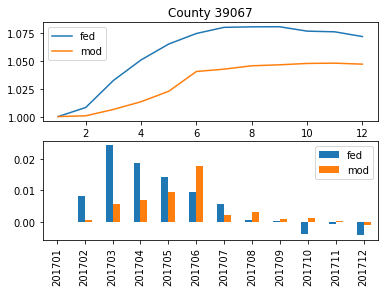

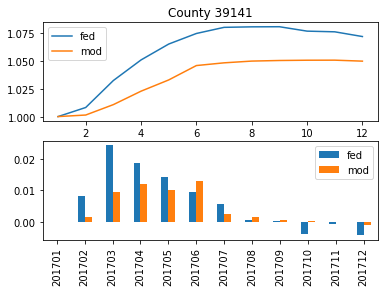

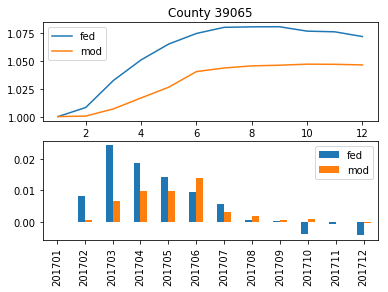

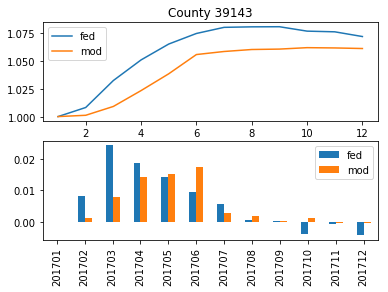

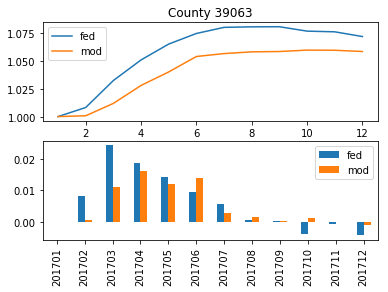

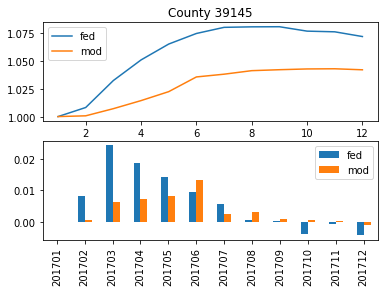

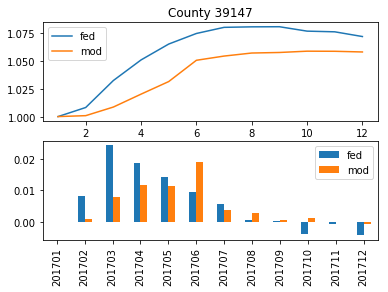

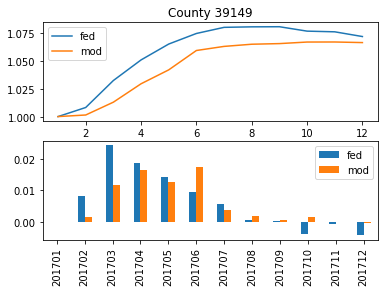

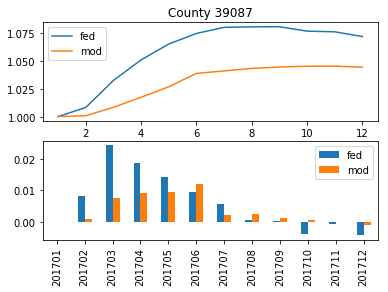

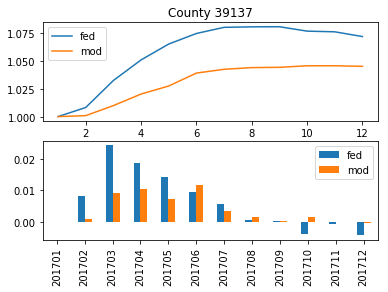

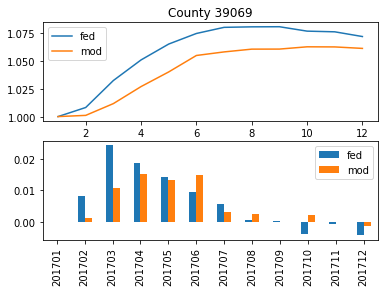

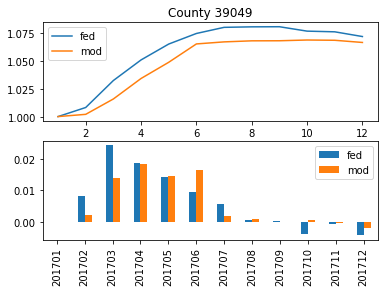

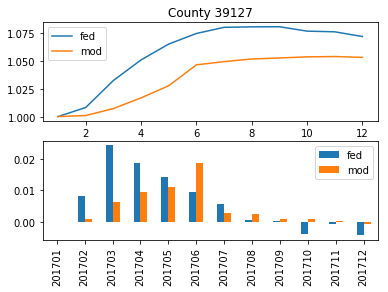

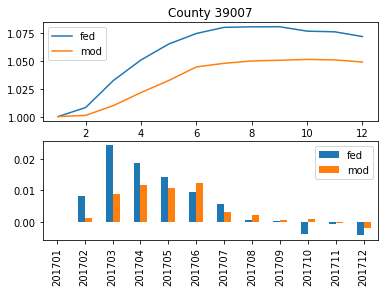

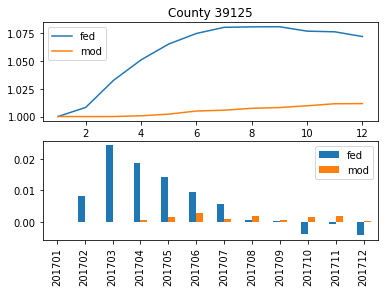

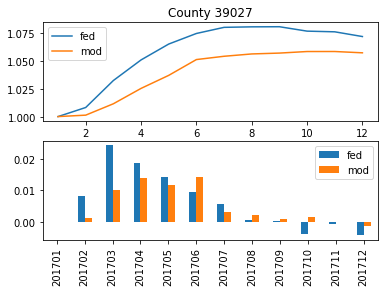

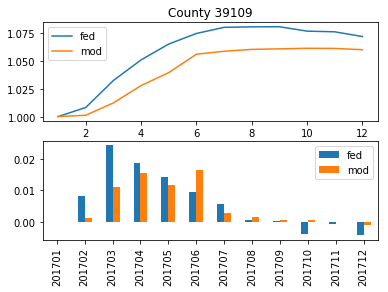

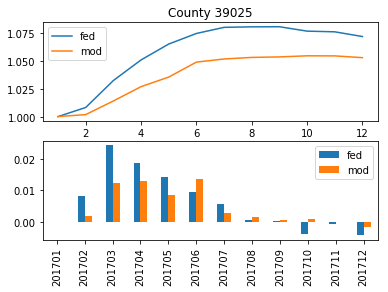

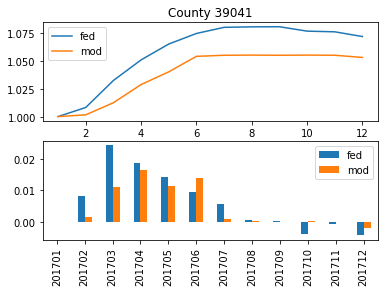

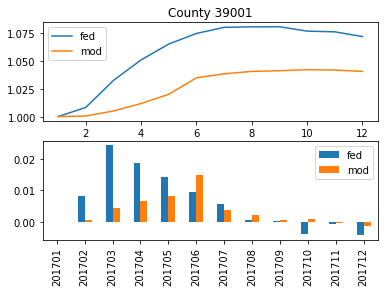

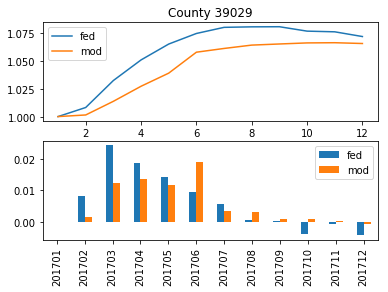

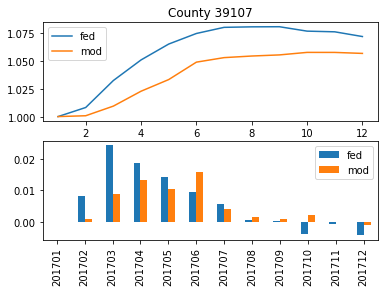

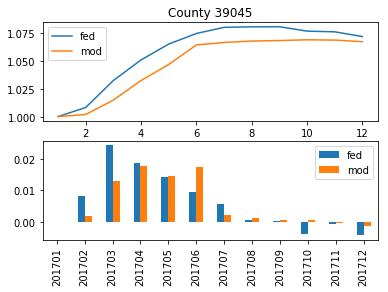

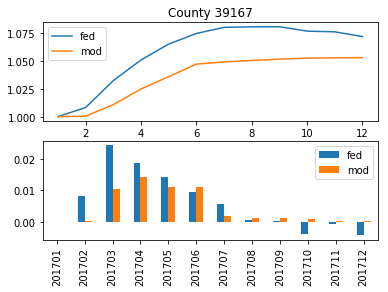

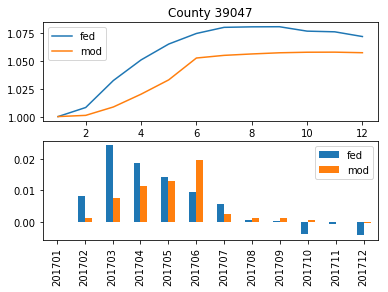

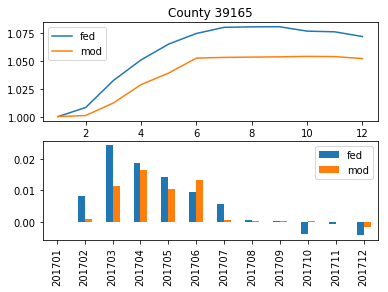

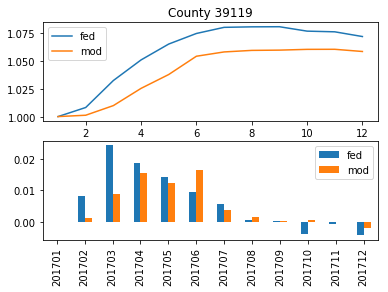

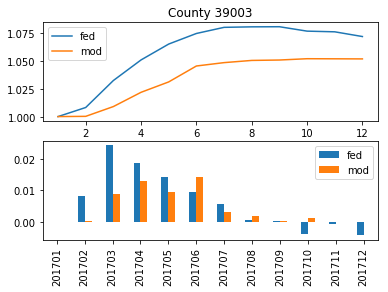

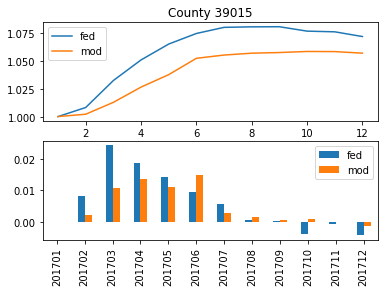

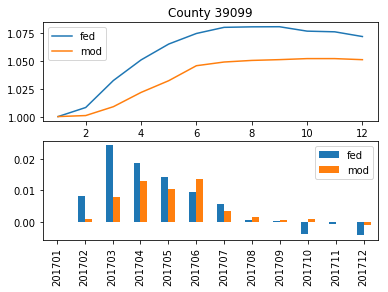

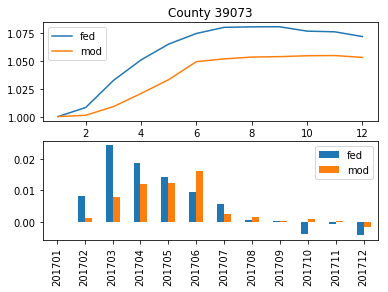

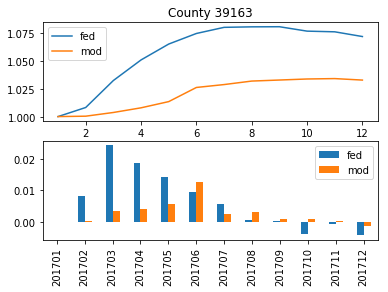

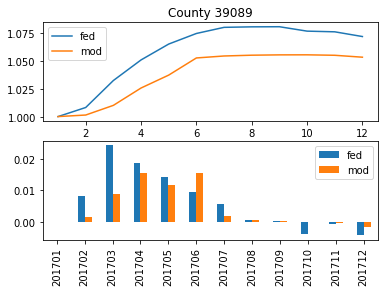

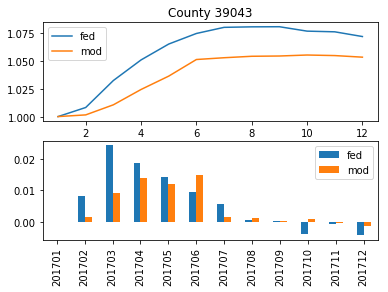

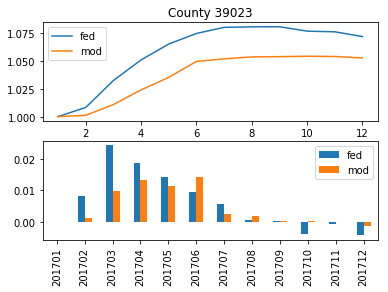

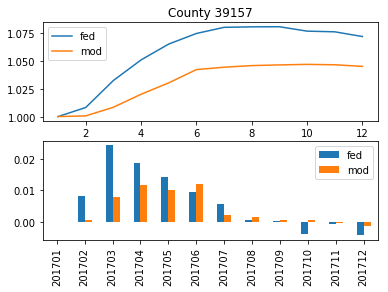

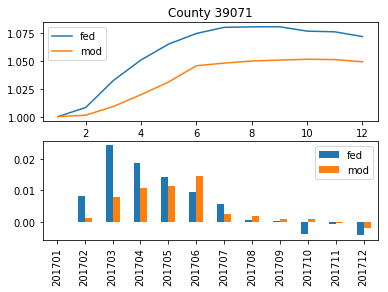

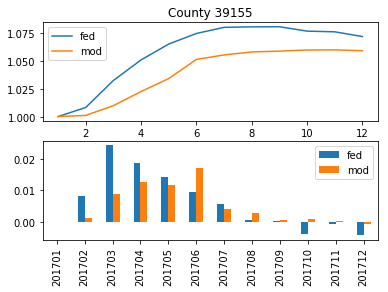

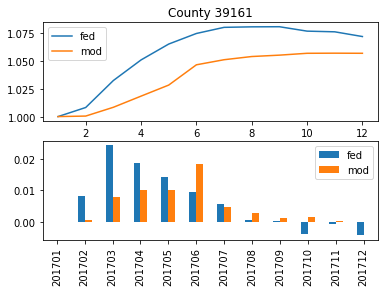

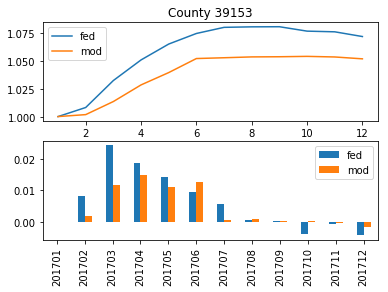

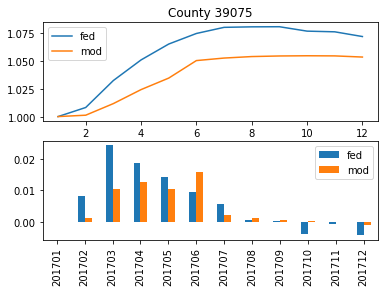

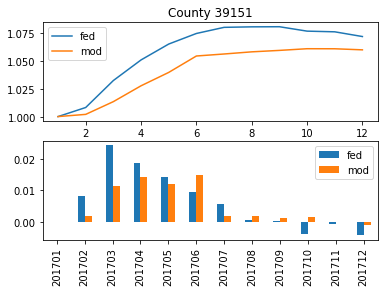

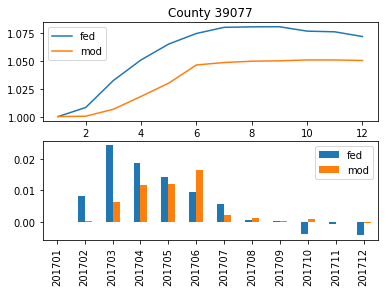

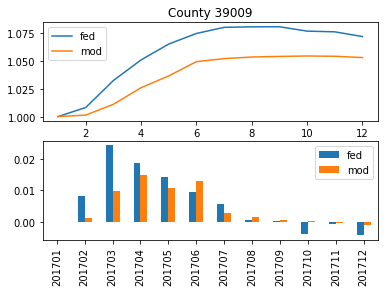

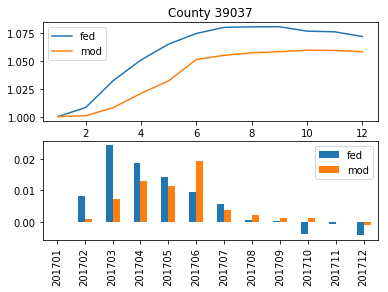

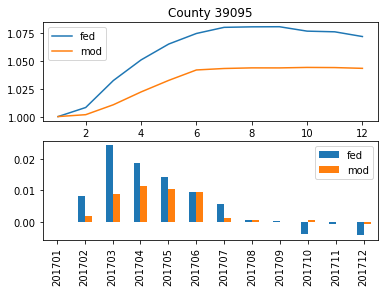

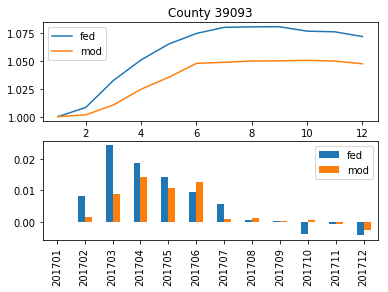

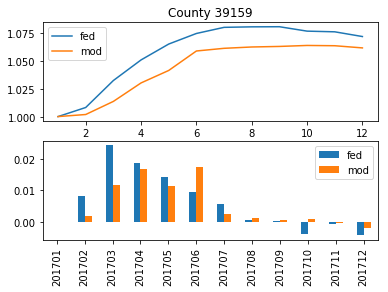

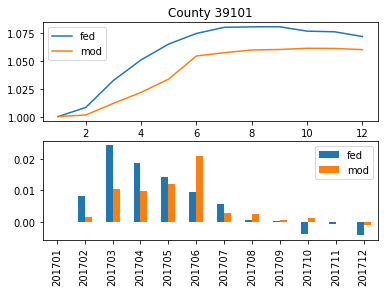

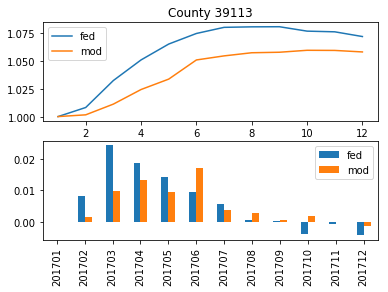

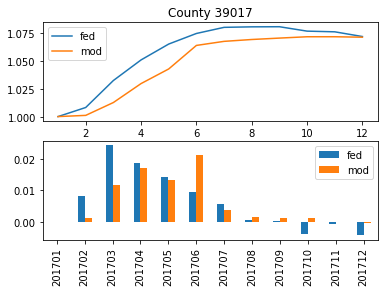

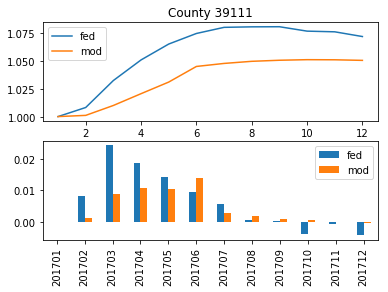

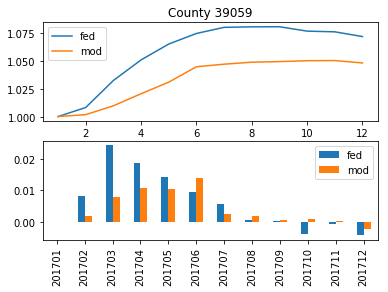

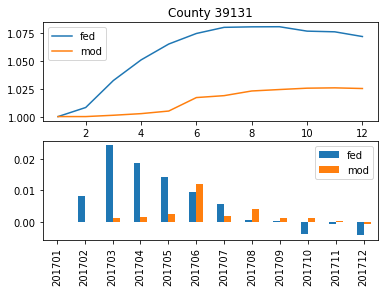

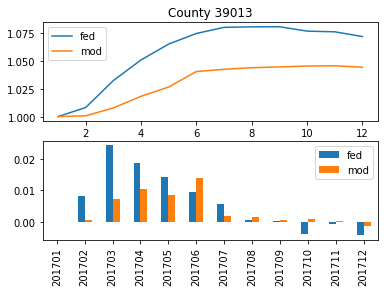

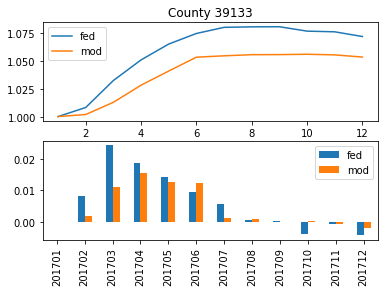

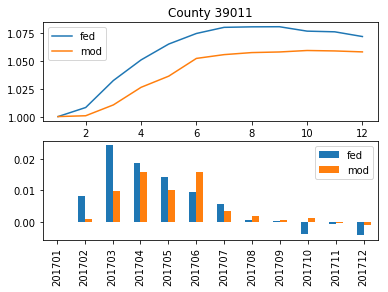

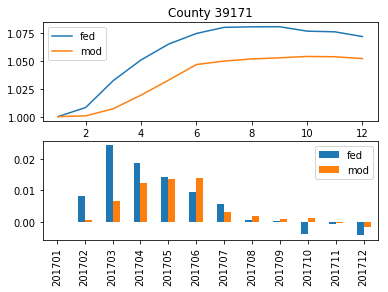

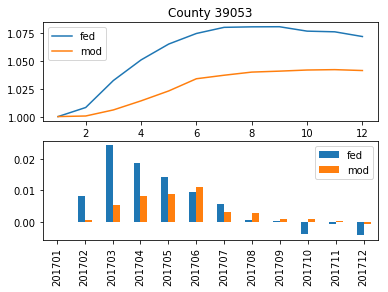

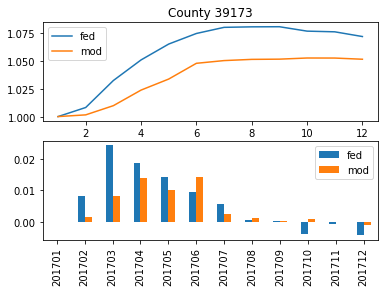

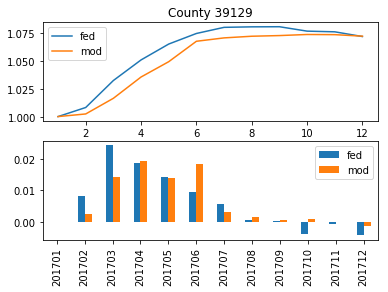

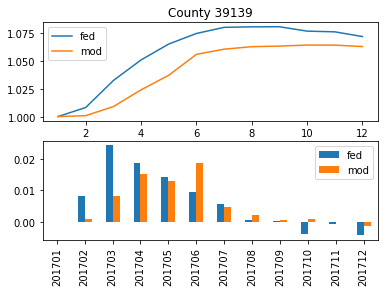

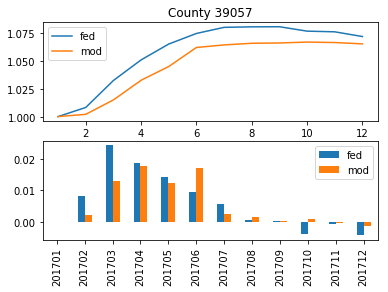

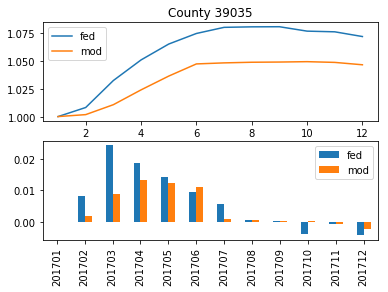

In [58]:
h(set(['39095', '39027', '39109', '39029', '39059', '39025', '39083', '39107', '39057', '39067', '39141', '39065', '39143', '39063', '39145', '39147', '39149', '39087', '39111', '39069', '39049', '39127', '39007', '39125', '39001', '39045', '39003', '39041', '39163', '39043', '39161', '39009', '39167', '39047', '39165', '39129', '39011', '39023', '39103', '39053', '39089', '39101', '39173', '39051', '39157', '39071', '39155', '39073', '39153', '39075', '39151', '39077', '39097', '39099', '39093', '39159', '39091', '39113', '39017', '39137', '39015', '39131', '39013', '39133', '39079', '39171', '39035', '39119', '39037', '39139', '39031', '39019']))